## Correlation Analysis and Hypothesis Testing

In [ ]:
import config
import seaborn as sns
from scipy import stats

In [ ]:
data_df = config.main()[1]

### Correlation Analysis

Below is the correlation matrix between energy consumption, emissions, 
and building size.

<Axes: >

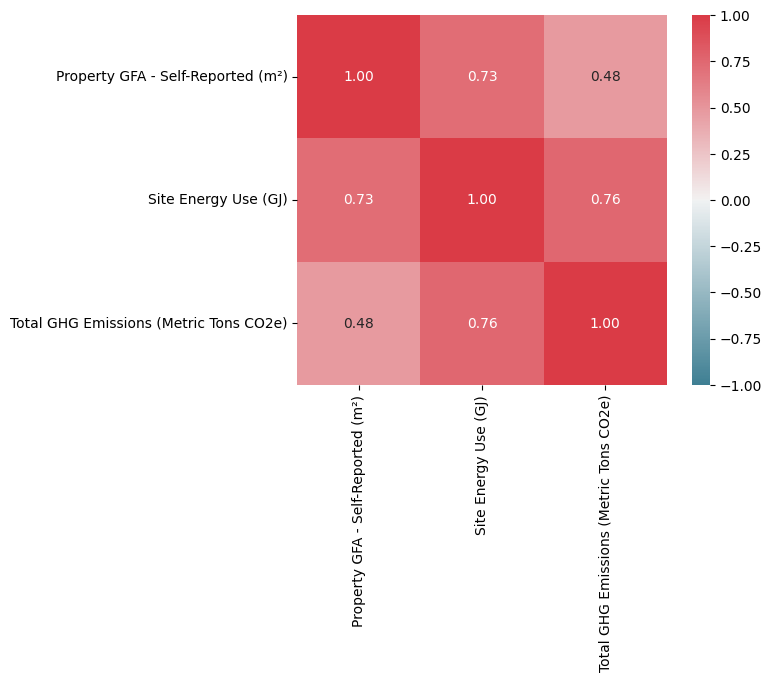

In [3]:
df_corr = data_df.loc[:,["Property GFA - Self-Reported (m²)","Site Energy Use (GJ)","Total GHG Emissions (Metric Tons CO2e)"]].corr()
sns.heatmap(df_corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True,
    annot=True,
    fmt=".2f"
)

### Hypothesis Testing

Below is a t-test comparing the average Energy Star Score between two different property types (e.g., Offices vs. Residential buildings).

A t-test is used to compare the means of two groups to determine if they are significantly different from each other. More at Student's t-test - Wikipedia

In [4]:
n_office = 25
n_pub_services = 25

x = data_df[data_df["Primary Property Type - Self Selected"] == "Office"]["Site Energy Use (GJ)"].sample(n = n_office)
y = data_df[data_df["Primary Property Type - Self Selected"] == "Other - Public Services"]["Site Energy Use (GJ)"].sample(n = n_pub_services)


dof = min(n_office,n_pub_services) - 1
t_stat, p_val = stats.ttest_ind(x, y, equal_var = False)  
print("t-statistic = " + str(round(t_stat,4)))  
print("p-value = " + str(round(p_val,4)))

t-statistic = 2.6977
p-value = 0.0126


<Axes: >

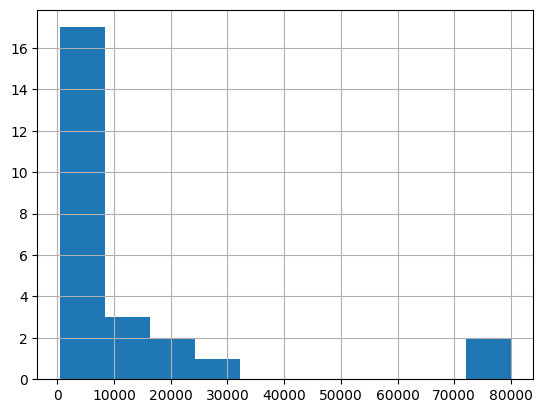

In [5]:
x.hist(grid=True)

<Axes: >

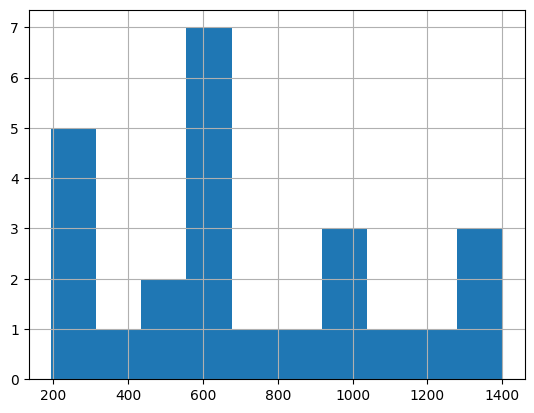

In [6]:
y.hist(grid=True)